<a href="https://colab.research.google.com/github/roccaab/WaveletGAN/blob/main/Analisi%20dati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

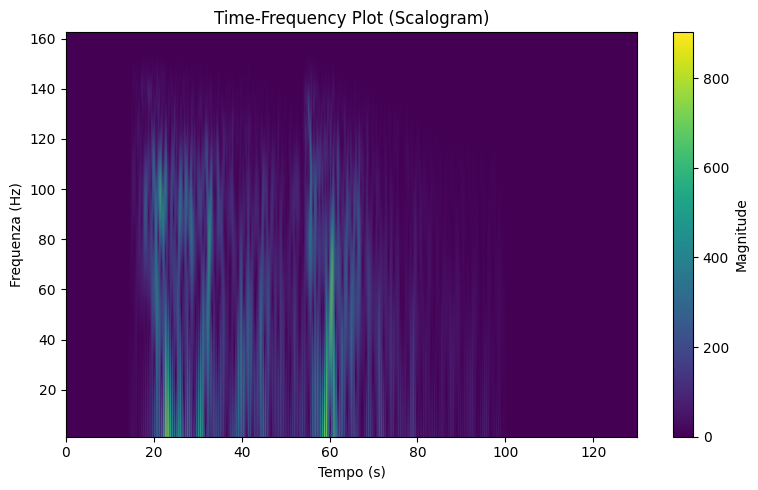

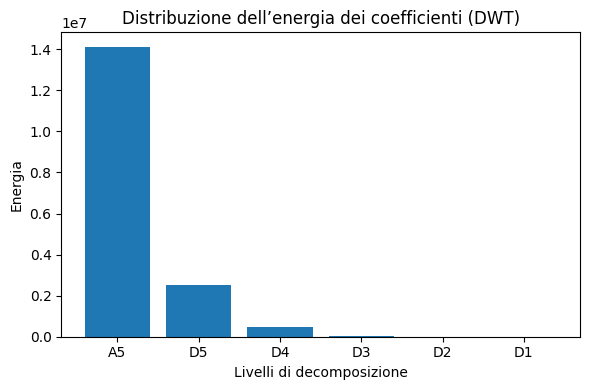

<ipython-input-9-b69082473460>:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(coeffs, labels=['A5', 'D5', 'D4', 'D3', 'D2', 'D1'])


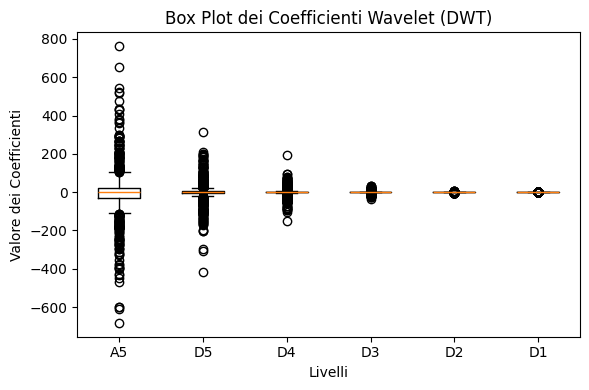

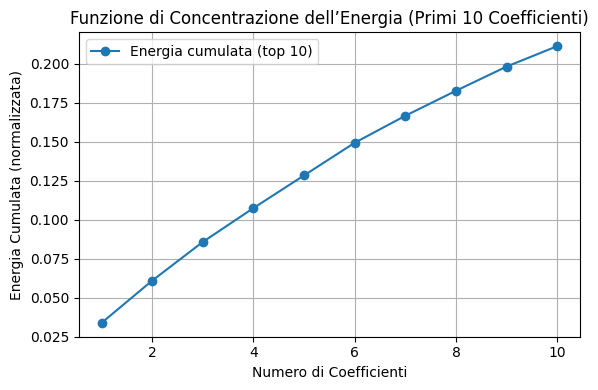

In [9]:
!pip install PyWavelets

import numpy as np
import pywt
import matplotlib.pyplot as plt

# LETTURA DEI DATI da file csv
file_path = 'E1.ASC'
with open(file_path, 'r') as f:
    data = [float(line.strip()) for line in f]

data = np.array(data)
n = len(data)
dt = 0.005  # questo è il passo di campionamento

# DECOMPOSIZIONE WAVELET DISCRETA (DWT)
wavelet = 'db4'
level = 5

# coeffs è una lista: coeffs[0] = cA5, coeffs[1] = cD5, coeffs[2] = cD4, ...
coeffs = pywt.wavedec(data, wavelet, level=level)

# Per chiarezza, estraiamo i nomi delle componenti:
cA5 = coeffs[0]   # Approssimazione al 5° livello
cD5, cD4, cD3, cD2, cD1 = coeffs[1:]  # Dettagli ai vari livelli

# 3. PLOT 1: SCALOGRAMMA (CWT) CON FREQUENZE
# ==========================================
# Eseguiamo la CWT per ottenere un grafico tempo-frequenza.
# Scales: scelte in modo euristico, da adattare in base alla lunghezza dei dati.
scales = np.arange(1, 128)
coeffs_cwt, freqs = pywt.cwt(data, scales, 'morl', sampling_period=dt)

# Convertiamo le scale in frequenze
frequencies = pywt.scale2frequency('morl', scales) / dt

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(coeffs_cwt),
           extent=[time[0], time[-1], frequencies[-1], frequencies[0]],
           cmap='viridis', aspect='auto', origin='upper')
plt.colorbar(label='Magnitude')
plt.title('Time-Frequency Plot (Scalogram)')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequenza (Hz)')
plt.tight_layout()
plt.show()

# DISTRIBUZIONE DELL'ENERGIA DEI COEFFICIENTI DWT
# energia di ogni vettore di coefficienti (somma dei quadrati).
energy_levels = [np.sum(np.square(c)) for c in coeffs]
labels = ['A5', 'D5', 'D4', 'D3', 'D2', 'D1']  # in ordine cA5, cD5, cD4, ...

plt.figure(figsize=(6, 4))
plt.bar(labels, energy_levels)
plt.title('Distribuzione dell’energia dei coefficienti (DWT)')
plt.xlabel('Livelli di decomposizione')
plt.ylabel('Energia')
plt.tight_layout()
plt.show()

# BOX PLOT DEI COEFFICIENTI DWT
# notare che i coefficienti hanno dimensioni diverse.
# Li passiamo comunque a boxplot come liste separate.
plt.figure(figsize=(6, 4))
plt.boxplot(coeffs, labels=['A5', 'D5', 'D4', 'D3', 'D2', 'D1'])
plt.title('Box Plot dei Coefficienti Wavelet (DWT)')
plt.xlabel('Livelli')
plt.ylabel('Valore dei Coefficienti')
plt.tight_layout()
plt.show()

# FUNZIONE DI CONCENTRAZIONE DELL’ENERGIA per i primi 10 coefficienti
# Si crea un vettore con TUTTI i coefficienti e calcoliamo l’energia totale
all_coeffs = np.concatenate(coeffs)
energy_total = np.sum(all_coeffs**2)

# Ordiniamo i coefficienti in base al loro contributo energetico (valore quadratico) in ordine decrescente
sorted_coeffs = np.sort(all_coeffs**2)[::-1]

# Selezioniamo i primi 10 coefficienti e calcoliamo l'energia cumulata su di essi
top_10_energy = sorted_coeffs[:10]
cumulative_energy_top10 = np.cumsum(top_10_energy) / energy_total

plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, 11), cumulative_energy_top10, marker='o', label='Energia cumulata (top 10)')
plt.title('Funzione di Concentrazione dell’Energia (Primi 10 Coefficienti)')
plt.xlabel('Numero di Coefficienti')
plt.ylabel('Energia Cumulata (normalizzata)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
